In [1]:
import jax
import jax.numpy as jnp
import jax.random as jrandom
import src.data.ToyData as ToyData
import src.models as models
import src.Trainer as Trainer
import src.SDESolver as SDESolver
import src.SDE as SDE
from src.plot import plot_trajectory_2d, plot_matrix, plot_score_field
import matplotlib.pyplot as plt


t: 0.0
num_steps: 100
dt: 0.009999999776482582
drift: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
dW: [[-0.05276183  0.21804537]
 [-0.09658578  0.0030763 ]
 [ 0.06746831 -0.07584117]
 [ 0.21016778  0.16793905]
 [-0.04578899 -0.0150665 ]
 [ 0.00066929  0.0277326 ]
 [-0.088853   -0.187732  ]
 [-0.05640263 -0.05483265]
 [-0.02625456 -0.01310967]
 [ 0.04163962  0.25416973]
 [-0.17374195 -0.00948701]
 [ 0.02857767 -0.16056404]
 [ 0.0266442   0.14753206]
 [ 0.08101757  0.06375214]
 [-0.1364711   0.13094637]
 [-0.12647845 -0.07907848]
 [ 0.01106925  0.03564483]
 [ 0.04219719 -0.07369165]
 [-0.00801062  0.09296388]
 [ 0.05378723  0.11345366]
 [ 0.00904255 -0.05870095]
 [ 0.10779505  0.00823024]
 [-0.11832061 -0.27711576]
 [-0.02376852 -0.1192695 ]
 [ 0.

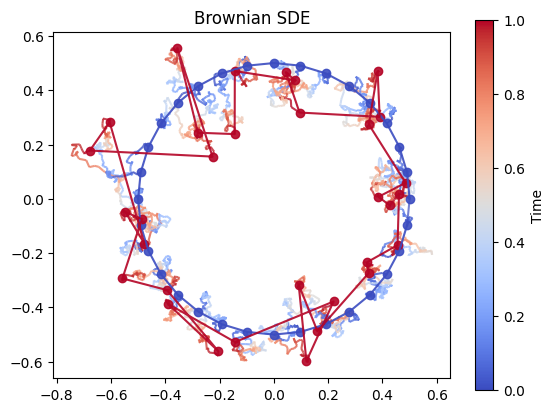

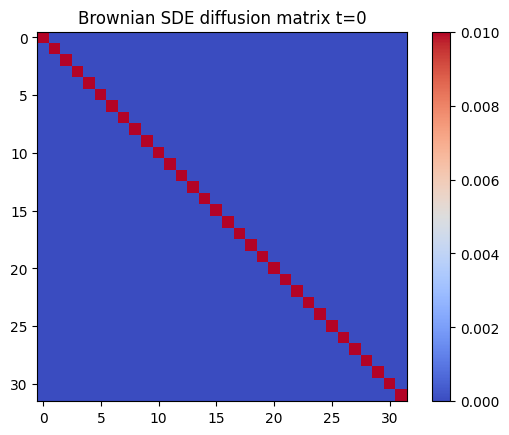

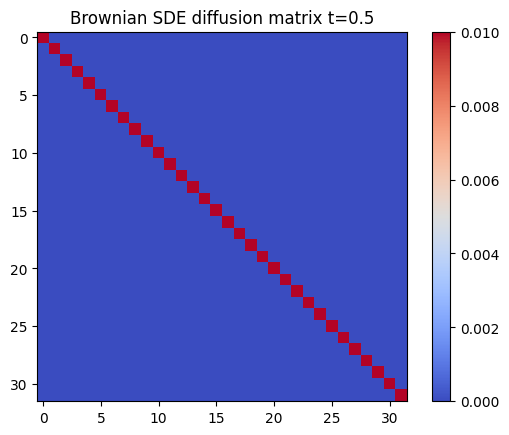

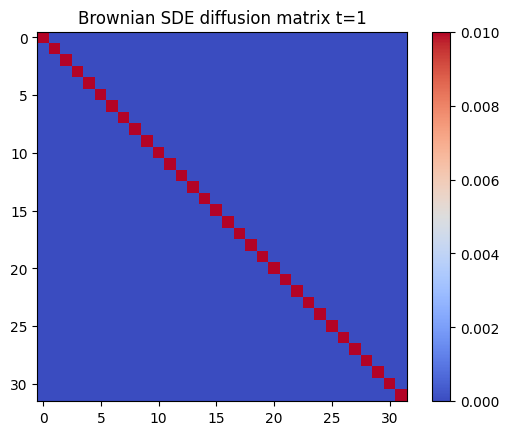

In [2]:


data_generator = ToyData.CircleDataGenerator(landmark_num=32, radius=0.5, center=jnp.array([0, 0]), seed=4523663)
trainer = Trainer.SsmTrainer(seed=445632)
model = models.DsmModel(dim=2, hidden_dims=(128,256, 512, 256,128), with_x0=True)

x_0 = data_generator.generate_data(jrandom.PRNGKey(0), 64)
brownian_sde = SDE.Brownian_Motion_SDE(dim=2, sigma=0.1, x0=x_0[0])
kunita_lagrange_sde = SDE.Kunita_Lagrange_SDE(sigma=0.1, kappa=0.3, x0=x_0[0])
kunita_eulerian_sde = SDE.Kunita_Eulerian_SDE(sigma=0.5, kappa=0.06, grid_dim=2, grid_num=32, grid_range=(-1.5,1.5), x0=x_0[0])
sde_solver = SDESolver.EulerMaruyama.from_sde(brownian_sde, 0.01, 1, 2, jrandom.PRNGKey(1),debug_mode=True)
xs, diffusions = jax.vmap(sde_solver.solve, in_axes=(0, None))(x_0, jrandom.PRNGKey(5))


plot_trajectory_2d(xs[0], "Brownian SDE", simplified=False)
plot_matrix(diffusions[0, 0] @ diffusions[0, 0].T, "Brownian SDE diffusion matrix t=0")
plot_matrix(diffusions[0,49] @ diffusions[0,49].T, "Brownian SDE diffusion matrix t=0.5")
plot_matrix(diffusions[0, -1] @ diffusions[0, -1].T, "Brownian SDE diffusion matrix t=1")

plt.show()


Bar desc:   0%|          | 0/1000 [00:00<?, ?it/s]

(101,)
(100, 64)


Training loss: 979.3265991210938: 100%|██████████| 1000/1000 [01:07<00:00, 14.85it/s]


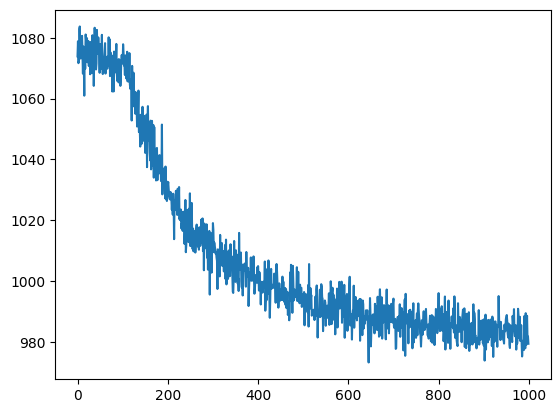

In [3]:

train_state = trainer.train_state_init(model, lr=1e-4, model_kwargs={'x': x_0[0], 't': jnp.array([0]), 'x0': x_0[0]})
train_state, losses = trainer.train(train_state, brownian_sde, sde_solver, data_generator, 1000, 64)
plt.plot(losses)
plt.show()




(1, 32, 2)
(32, 2)
t: 0.0
dt: 0.009999999776482582
num_steps: 100
drift: [[-0.7352209  -0.00519246]
 [-0.7196045  -0.14039159]
 [-0.67712784 -0.2684462 ]
 [-0.6096649  -0.3847885 ]
 [-0.5190897  -0.48192263]
 [-0.40540218 -0.5734348 ]
 [-0.281564   -0.65838814]
 [-0.16287923 -0.72335243]
 [-0.03601536 -0.7627058 ]
 [ 0.11118889 -0.77207565]
 [ 0.27609825 -0.74459076]
 [ 0.42382956 -0.6846237 ]
 [ 0.5381417  -0.59217453]
 [ 0.62122107 -0.46443224]
 [ 0.6733799  -0.30936122]
 [ 0.6902456  -0.15710115]
 [ 0.68274975 -0.01747087]
 [ 0.65651417  0.12625873]
 [ 0.6127882   0.270164  ]
 [ 0.5540705   0.39572   ]
 [ 0.4738021   0.51315546]
 [ 0.3669858   0.6146622 ]
 [ 0.23643255  0.69274426]
 [ 0.09900808  0.7383442 ]
 [-0.02783626  0.75021267]
 [-0.15694499  0.727725  ]
 [-0.2946818   0.6702566 ]
 [-0.41851997  0.58467865]
 [-0.5278349   0.48004866]
 [-0.62090874  0.36230087]
 [-0.6864977   0.24595857]
 [-0.7239771   0.12703955]]
diffusion: [[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.

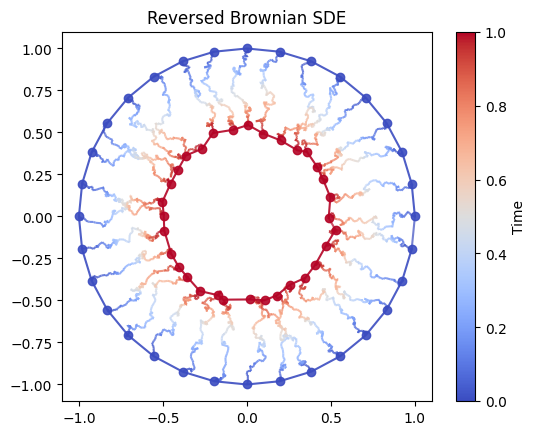

In [4]:
from src.plot import plot_score_field
score_fn = lambda x, t, x0: train_state.apply_fn(train_state.params, x, t, x0=x0)
data_generator = ToyData.CircleDataGenerator(landmark_num=32, radius=1, center=jnp.array([0, 0]), seed=486435)
xt = data_generator.generate_data(jrandom.PRNGKey(6), 1)
print(xt.shape)
print(x_0[0].shape)
reversed_sde = SDE.Time_Reversed_SDE(brownian_sde, score_fn, 1, 0.01)
reversed_sde_solver = SDESolver.EulerMaruyama.from_sde(reversed_sde, 0.01, 1, 2, jrandom.PRNGKey(8), condition_x=x_0[0],debug_mode=True)
xs, _ = reversed_sde_solver.solve(xt[0], jrandom.PRNGKey(156))
plot_trajectory_2d(xs, "Reversed Brownian SDE", simplified=False)
# plot_score_field(score_fn, 1, x_0[0])
# plot_score_field(score_fn, 0.5, x_0[0])
# plot_score_field(score_fn, 0, x_0[0])


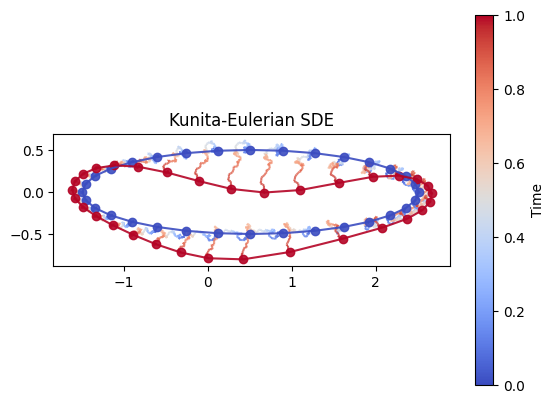

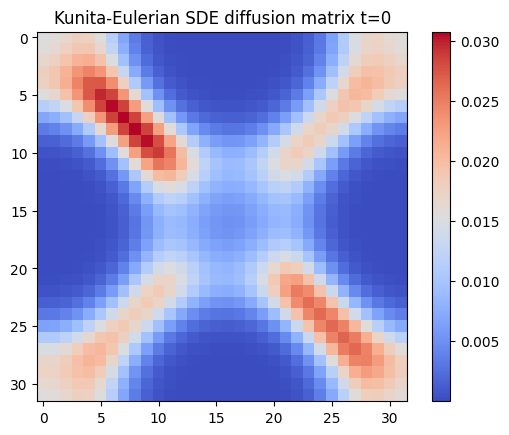

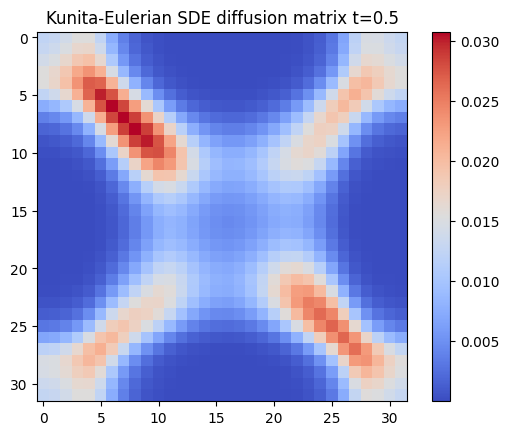

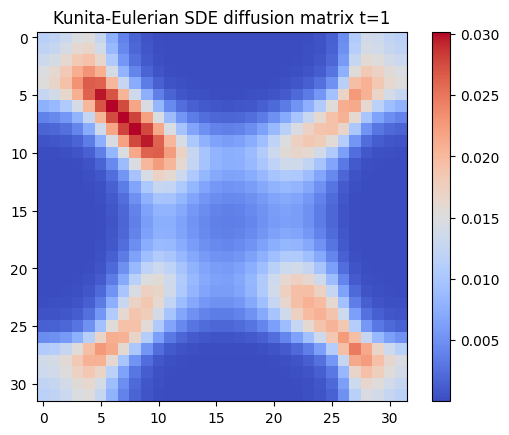

Bar desc:   0%|          | 0/1000 [00:00<?, ?it/s]

(101,)
(100, 8)


Training loss: 126.93973541259766: 100%|██████████| 1000/1000 [00:51<00:00, 19.36it/s]


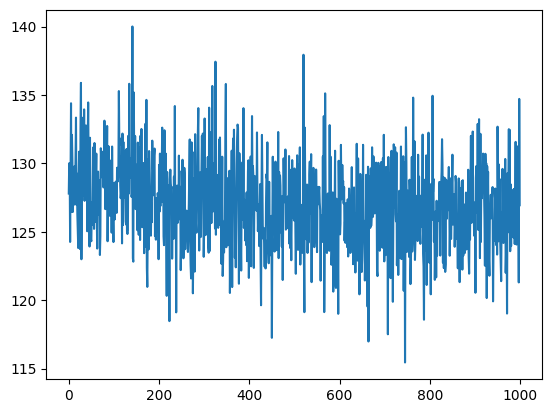

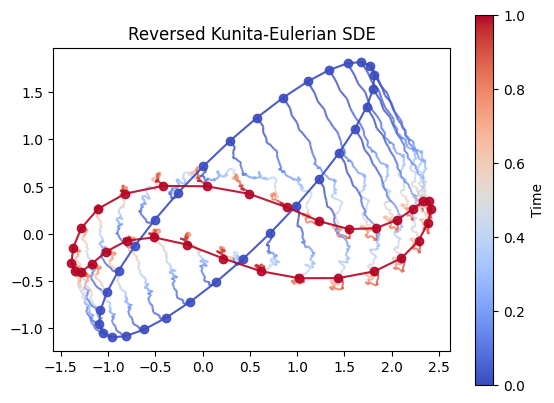

In [5]:
# example 2: learning the score function of a Kunita-Eulerian SDE
# circle_data_generator = ToyData.CircleDataGenerator(landmark_num=32, radius=0.5, center=jnp.array([0, 0]), seed=165)
import src.math.geometry as geometry
theta_1 = 0
theta_2 = jnp.pi/4  
rotation_matrix_1 = geometry.get_rotation_matrix(theta_1)
rotation_matrix_2 = geometry.get_rotation_matrix(theta_2)
ellipse_data_generator = ToyData.EllipseDataGenerator(landmark_num=32, a=2, b=0.5, rotation_matrix=rotation_matrix_1, center=jnp.array([0.51, 0]), seed=126)
x_0 = ellipse_data_generator.generate_data(jrandom.PRNGKey(2), 8)
kunita_eulerian_sde = SDE.Kunita_Eulerian_SDE(sigma=0.005, kappa=0.7, grid_dim=2, grid_num=100, grid_range=(-1,2.5), x0=x_0[0])
kunita_eulerian_sde_solver = SDESolver.EulerMaruyama.from_sde(kunita_eulerian_sde, 0.01, 1, 2, jrandom.PRNGKey(25))


xs, diffusions = jax.vmap(kunita_eulerian_sde_solver.solve, in_axes=(0, None))(x_0, jrandom.PRNGKey(65))
plot_trajectory_2d(xs[0], "Kunita-Eulerian SDE", simplified=False)
plot_matrix(diffusions[0, 0] @ diffusions[0, 0].T, "Kunita-Eulerian SDE diffusion matrix t=0")
plot_matrix(diffusions[0,49] @ diffusions[0,49].T, "Kunita-Eulerian SDE diffusion matrix t=0.5")
plot_matrix(diffusions[0, -1] @ diffusions[0, -1].T, "Kunita-Eulerian SDE diffusion matrix t=1")
plt.show()

model = models.DsmModel(dim=2, hidden_dims=(128, 512, 128), with_x0=True)
trainer = Trainer.SsmTrainer(seed=346)
train_state = trainer.train_state_init(model, lr=1e-3, model_kwargs={'x': x_0[0], 't': jnp.array([0]), 'x0': x_0[0]})
train_state, losses = trainer.train(train_state, kunita_eulerian_sde, kunita_eulerian_sde_solver, ellipse_data_generator, 1000, 8)
plt.plot(losses)
plt.show()

score_fn = lambda x, t, x0: train_state.apply_fn(train_state.params, x, t, x0=x0)
ellipse_data_generator_2 = ToyData.EllipseDataGenerator(landmark_num=32, a=2, b=0.5, rotation_matrix=rotation_matrix_2, center=jnp.array([0.51, 0]), seed=126)
xt = ellipse_data_generator_2.generate_data(jrandom.PRNGKey(1), 1)
reversed_sde = SDE.Time_Reversed_SDE(kunita_eulerian_sde, score_fn, 1, 0.01)
reversed_sde_solver = SDESolver.EulerMaruyama.from_sde(reversed_sde, 0.01, 1, 2, jrandom.PRNGKey(8), condition_x=x_0[0])
xs, _ = reversed_sde_solver.solve(xt[0], jrandom.PRNGKey(9))
plot_trajectory_2d(xs, "Reversed Kunita-Eulerian SDE", simplified=False)



In [6]:
# # example 3: learning the score function of a Kunita-Lagrange SDE
# circle_data_generator = ToyData.CircleDataGenerator(landmark_num=32, radius=0.5, center=jnp.array([0, 0]), seed=123)
# x_0 = circle_data_generator.generate_data(jrandom.PRNGKey(0), 16)


# kunita_lagrange_sde = SDE.Kunita_Lagrange_SDE(sigma=0.1 ,kappa=0.5, x0=x_0[0])
# kunita_lagrange_sde_solver = SDESolver.EulerMaruyama.from_sde(kunita_lagrange_sde, 0.01, 1, 2, jrandom.PRNGKey(4))
# xs, diffusions = jax.vmap(kunita_lagrange_sde_solver.solve, in_axes=(0, None))(x_0, jrandom.PRNGKey(5))
# plot_trajectory_2d(xs[0], "Kunita-Lagrange SDE", simplified=False)
# plot_matrix(diffusions[0, 0] @ diffusions[0, 0].T, "Kunita-Lagrange SDE diffusion matrix t=0")
# plot_matrix(diffusions[0,49] @ diffusions[0,49].T, "Kunita-Lagrange SDE diffusion matrix t=0.5")
# plot_matrix(diffusions[0, -1] @ diffusions[0, -1].T, "Kunita-Lagrange SDE diffusion matrix t=1")
# plt.show()


# model = models.DsmModel(dim=2, hidden_dims=(128, 512, 128), with_x0=True)
# trainer = Trainer.SsmTrainer(seed=124)
# train_state = trainer.train_state_init(model, lr=1e-4, model_kwargs={'x': x_0[0], 't': jnp.array([0]), 'x0': x_0[0]})
# train_state, losses = trainer.train(train_state, kunita_lagrange_sde, kunita_lagrange_sde_solver, circle_data_generator, 10000, 16)
# plt.plot(losses)
# plt.show()

# score_fn = lambda x, t, x0: train_state.apply_fn(train_state.params, x, t, x0=x0)
# circle_data_generator = ToyData.CircleDataGenerator(landmark_num=32, radius=1, center=jnp.array([0, 0]), seed=125)
# xt = circle_data_generator.generate_data(jrandom.PRNGKey(6), 1)
# reversed_sde = SDE.Time_Reversed_SDE(kunita_lagrange_sde, score_fn, 1, 0.01)
# reversed_sde_solver = SDESolver.EulerMaruyama.from_sde(reversed_sde, 0.01, 1, 2, jrandom.PRNGKey(7), condition_x=x_0[0])
# xs, _ = reversed_sde_solver.solve(xt[0], jrandom.PRNGKey(8))
# plot_trajectory_2d(xs, "Reversed Kunita-Lagrange SDE", simplified=False)
# plt.imshow(diffusions[0, 0] @ diffusions[0, 0].T)
# plt.show()


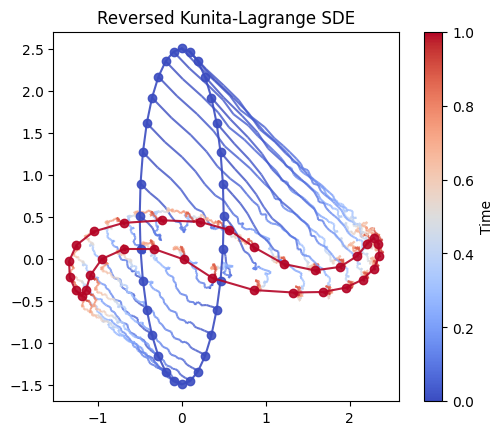

In [7]:

import src.math.geometry as geometry
theta = jnp.pi/2
rotation_matrix = geometry.get_rotation_matrix(theta)
ellipse_data_generator = ToyData.EllipseDataGenerator(landmark_num=32, a=2, b=0.5, rotation_matrix=rotation_matrix, center=jnp.array([0.51, 0]), seed=126)
xt = ellipse_data_generator.generate_data(jrandom.PRNGKey(3), 1)
reversed_sde = SDE.Time_Reversed_SDE(kunita_eulerian_sde, score_fn, 1, 0.01)
reversed_sde_solver = SDESolver.EulerMaruyama.from_sde(reversed_sde, 0.01, 1, 2, jrandom.PRNGKey(8), condition_x=x_0[0])
xs, _ = reversed_sde_solver.solve(xt[0], jrandom.PRNGKey(25))
plot_trajectory_2d(xs, "Reversed Kunita-Lagrange SDE", simplified=False)
